# Part I - (Dataset Exploration Title)
## by (your name here)

## Introduction
> Introduce the dataset

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling


In [135]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [136]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')

In [137]:
df.shape

(183412, 16)

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [139]:
df.sample(20)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
126290,747,2019-02-10 19:36:15.0110,2019-02-10 19:48:42.5120,127.0,Valencia St at 21st St,37.756708,-122.421025,370.0,Jones St at Post St,37.787327,-122.413278,6638,Subscriber,1987.0,Male,Yes
2472,819,2019-02-28 17:58:30.7840,2019-02-28 18:12:09.9620,350.0,8th St at Brannan St,37.771431,-122.405787,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,6555,Subscriber,1988.0,Male,No
134542,798,2019-02-08 17:09:36.3770,2019-02-08 17:22:54.8310,112.0,Harrison St at 17th St,37.763847,-122.413004,66.0,3rd St at Townsend St,37.778742,-122.392741,1161,Subscriber,1974.0,Male,No
131004,765,2019-02-09 14:20:55.7880,2019-02-09 14:33:41.2060,6.0,The Embarcadero at Sansome St,37.804770,-122.403234,371.0,Lombard St at Columbus Ave,37.802746,-122.413579,2270,Customer,NaN,NaN,No
48971,198,2019-02-22 06:05:43.1860,2019-02-22 06:09:02.1600,305.0,Ryland Park,37.342725,-121.895617,290.0,George St at 1st St,37.347732,-121.899464,2036,Subscriber,1983.0,Male,No
171941,739,2019-02-03 18:00:39.7660,2019-02-03 18:12:58.8910,323.0,Broadway at Kearny,37.798014,-122.405950,383.0,Golden Gate Ave at Franklin St,37.780787,-122.421934,4977,Subscriber,1985.0,Male,No
168864,1982,2019-02-04 12:46:16.0770,2019-02-04 13:19:18.3760,36.0,Folsom St at 3rd St,37.783830,-122.398870,375.0,Grove St at Masonic Ave,37.774836,-122.446546,5082,Subscriber,1986.0,Female,No
156586,918,2019-02-06 07:38:12.7100,2019-02-06 07:53:31.5340,95.0,Sanchez St at 15th St,37.766219,-122.431060,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,600,Subscriber,1989.0,Male,No
106078,682,2019-02-13 18:58:15.7470,2019-02-13 19:09:38.2080,144.0,Precita Park,37.747300,-122.411403,127.0,Valencia St at 21st St,37.756708,-122.421025,6537,Subscriber,1992.0,Female,No
70541,404,2019-02-19 18:13:31.4420,2019-02-19 18:20:15.7930,52.0,McAllister St at Baker St,37.777416,-122.441838,74.0,Laguna St at Hayes St,37.776435,-122.426244,5749,Subscriber,1982.0,Female,No


In [140]:
df.duplicated().sum()

0

In [141]:
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

We will convert `member_birth_year` to int64 and `user_type` to categorical, time fields to datetime and the station_ids to int.

In [142]:
df.member_birth_year.fillna(0,inplace=True)
df.member_birth_year = df.member_birth_year.astype('int64')
userclasses = pd.api.types.CategoricalDtype(ordered=True, categories=df.user_type.unique())
df.user_type = df.user_type.astype(userclasses)
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)
df.start_station_id.fillna(0,inplace=True)
df.end_station_id.fillna(0,inplace=True)
df.start_station_id = df.start_station_id.astype('int64')
df.end_station_id = df.end_station_id.astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  int64         
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  int64         
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  int64         
 12  user_type       

In [178]:
print("Year :",df.start_time.dt.year.unique())
print("Month :", df.start_time.dt.month_name().unique())

Year : [2019]
Month : ['February']


The dataset is from the year 2019 February

array(['February'], dtype=object)

### What is the structure of your dataset?

> The dataset has 16 columns and 183412 observations

### What is/are the main feature(s) of interest in your dataset?

> For me it's how age, gender, user_type, day related with a trip durations. I'm also interested in how the trips are spread out geographically. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Age, Gender, User type, Day of the week and Ride duration

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


### Q1: What is the distribution of `duration_sec`?

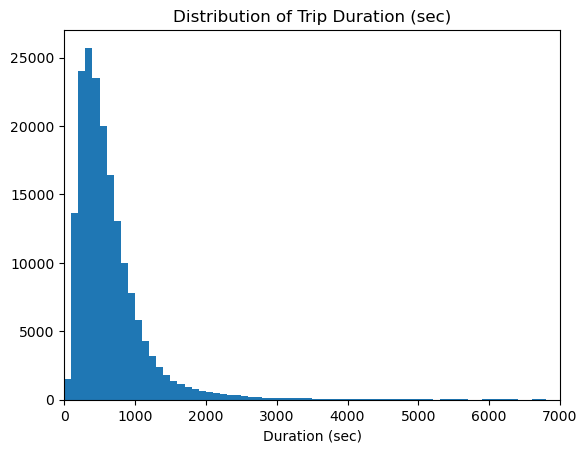

In [144]:
bins = np.arange(0,df.duration_sec.max()+100, 100)
plt.hist(x='duration_sec',data=df,bins=bins)
plt.xlim(0,7000)
plt.title('Distribution of Trip Duration (sec)')
plt.xlabel('Duration (sec)');

We can see majority of the trips are from 0sec to 1000 secs. Instead of doing mental calculation on how much it is in minutes we can convert the seconds to minutes and change the scale to a log.

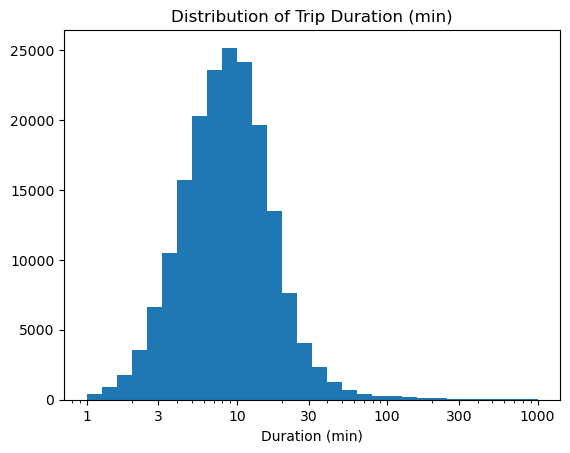

In [145]:
df['duration_min'] = df.duration_sec / 60
bins = 10**np.arange(0 , 3 + 0.1 , 0.1)
ticks = [1,3,10,30,100,300,1000]
labels = ['{}'.format(b) for b in ticks]
plt.hist(x='duration_min',data=df,bins=bins)
plt.xscale('log')
plt.title('Distribution of Trip Duration (min)')
plt.xticks(ticks,labels)
plt.xlabel('Duration (min)');

We can clearly see the peak is at ~ 10 minute mark.

### Q2: What's the percentage of subscribers and which `user_type` consitutes the majority?

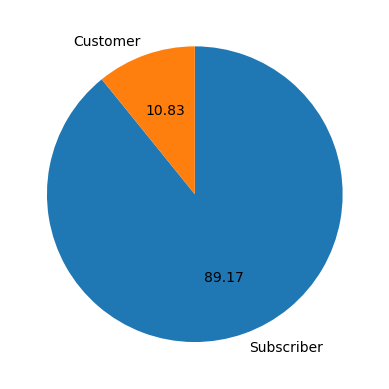

In [146]:
user_type_counts = df.user_type.value_counts()
plt.pie(user_type_counts,labels=user_type_counts.index,startangle = 90, counterclock = False,
        autopct='%.2f');

In this dataset subscribers count to 89% of the user base. It makes sense since the price for a memberships during when this data was captured is $15 per month/$149 per year. Compared to day pass tickets which costs $10 per day and single ticket pass which costs $2 per day.

### Q3: What is the gender distribution in this dataset

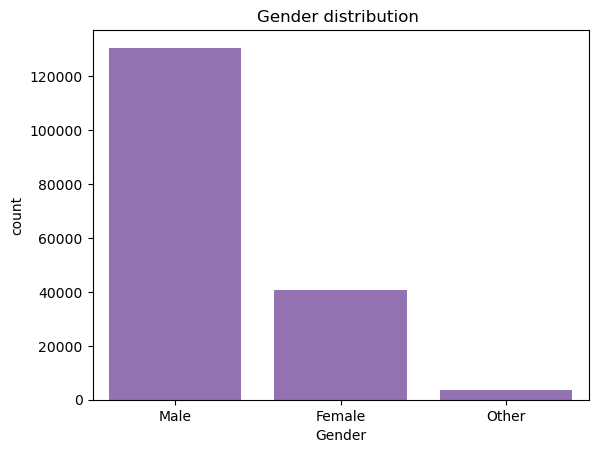

In [147]:
color = sb.color_palette()[4]
gender_order = df.member_gender.value_counts().index
sb.countplot(data=df,x='member_gender',order = gender_order,color=color)
plt.xlabel('Gender')
plt.title('Gender distribution ');

Users are exceedingly male with about 120,000 while females are 40,000 users

### Q4: Whats the percentage of users who are enrolled in the Bike Share for All programs

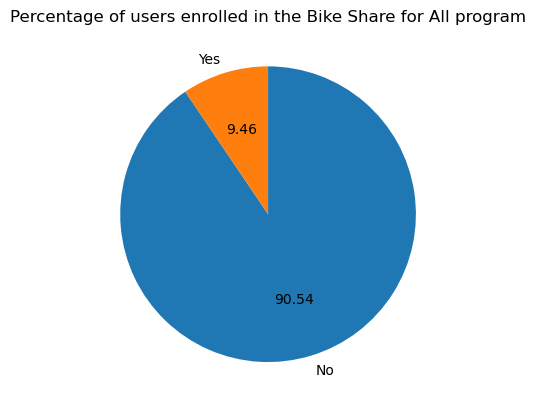

In [148]:
bike_share_counts = df.bike_share_for_all_trip.value_counts()
plt.pie(bike_share_counts,labels=bike_share_counts.index,startangle = 90, counterclock = False,
        autopct='%.2f')
plt.title('Percentage of users enrolled in the Bike Share for All program');

Most of the users are not enrolled in the Bike Share for All program

### Q5: For columns missing data, how much are they missing and whats the proportion?

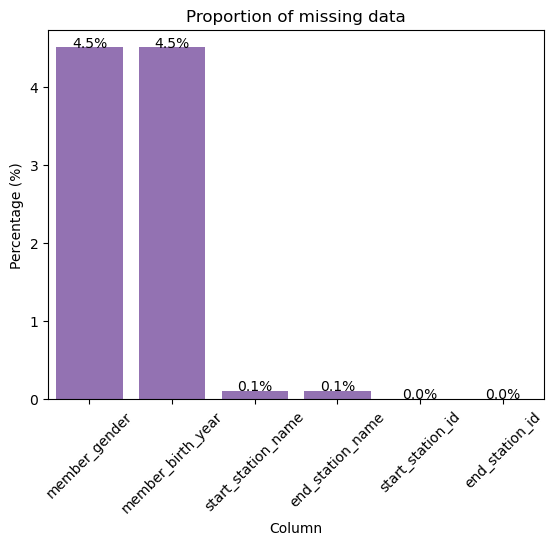

In [149]:
total_count = df.shape[0]

# Inorder to convert the member_birth_year to int we had to fillna with 0
# So that member_birth_year can show up in this visualization we will create a copy of the dataframe
# And set member_birth_year values that are 0 tp NaN
missing_data = df.copy()
missing_data.loc[missing_data.member_birth_year == 0,'member_birth_year'] = np.nan

na_counts = missing_data[['start_station_id','start_station_name','end_station_id',
                'end_station_name','member_gender','member_birth_year'
                ]].isna().sum() / total_count * 100
na_counts = na_counts.sort_values(ascending=False)
sb.barplot(x=na_counts.index.values, y=na_counts,order=na_counts.index, color=color)

plt.xticks(rotation=45) 

for i in range (na_counts.shape[0]):
    count = round(na_counts[i],1)

    plt.text(i, count+0.15, f'{count}%', ha = 'center', va='top')

plt.title('Proportion of missing data')
plt.xlabel('Column')
plt.ylabel('Percentage (%)');

`member_gender` and `member_birth_year` is missing 4.5% of the total data while the other columns are missing only 0.1%

### Q6: Distribution of `member_birth_year`

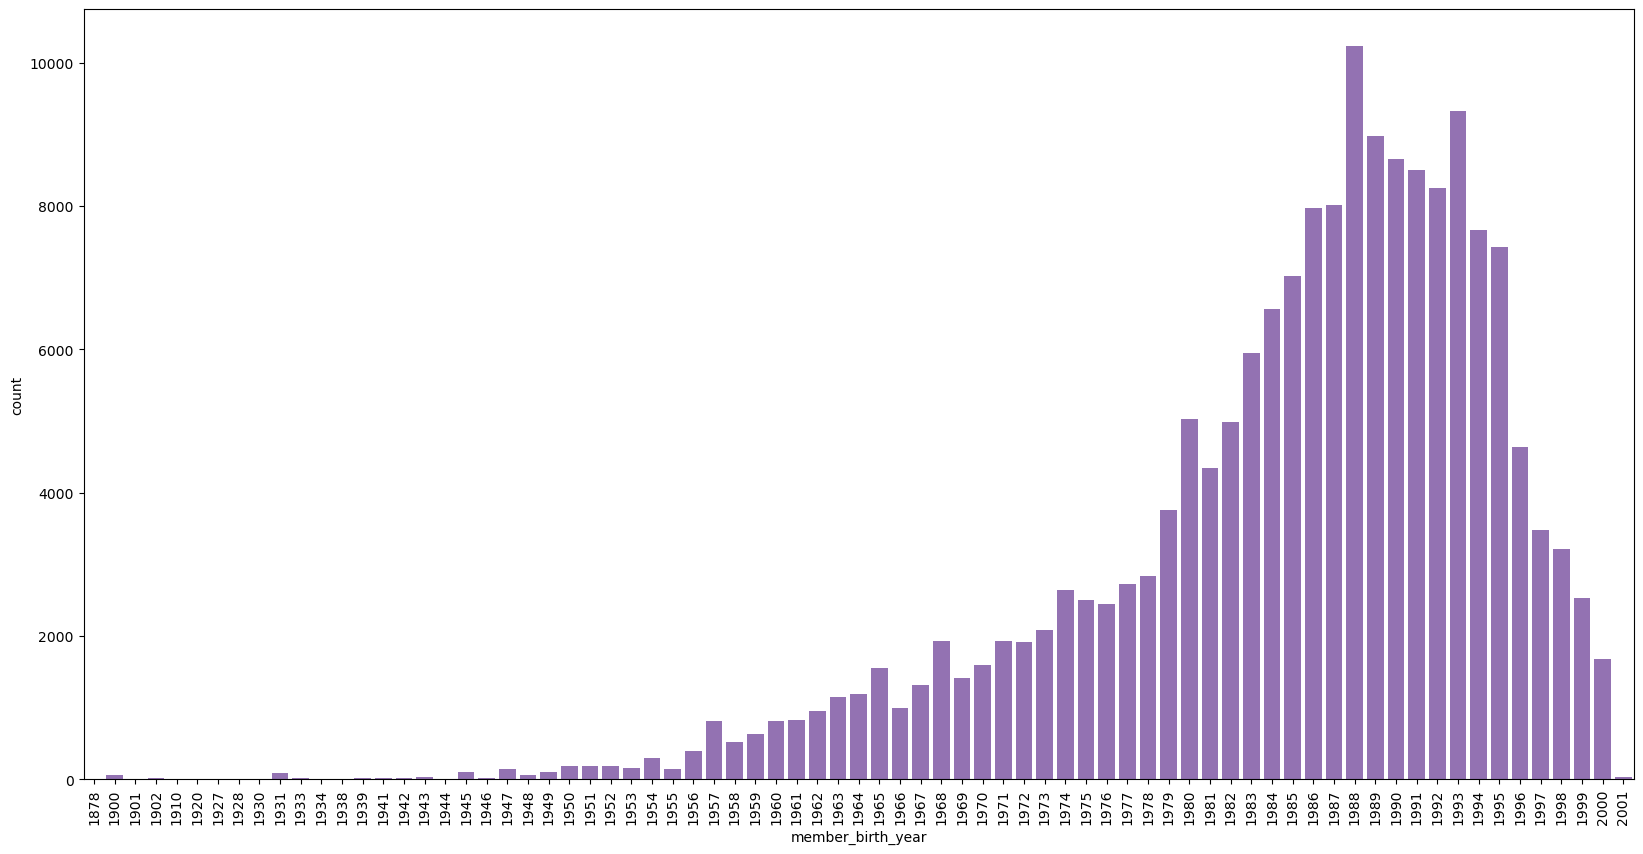

In [150]:
plt.figure(figsize=(20 , 10))
birth_year = df.query('member_birth_year>0')
sb.countplot(data=birth_year,x='member_birth_year',color=color)
plt.xticks(rotation = 90);

Most of the users were born around 1986 - 1995. To put this into context of age of the users when this data was collected, we will calculate it by subtracting 2019 from the `member_birth_year` since the data was from the year 2019. 

In [151]:
df['age'] = 2019 - df.member_birth_year
df.age.describe()

count    183412.000000
mean        123.633868
std         411.850439
min          18.000000
25%          27.000000
50%          32.000000
75%          40.000000
max        2019.000000
Name: age, dtype: float64

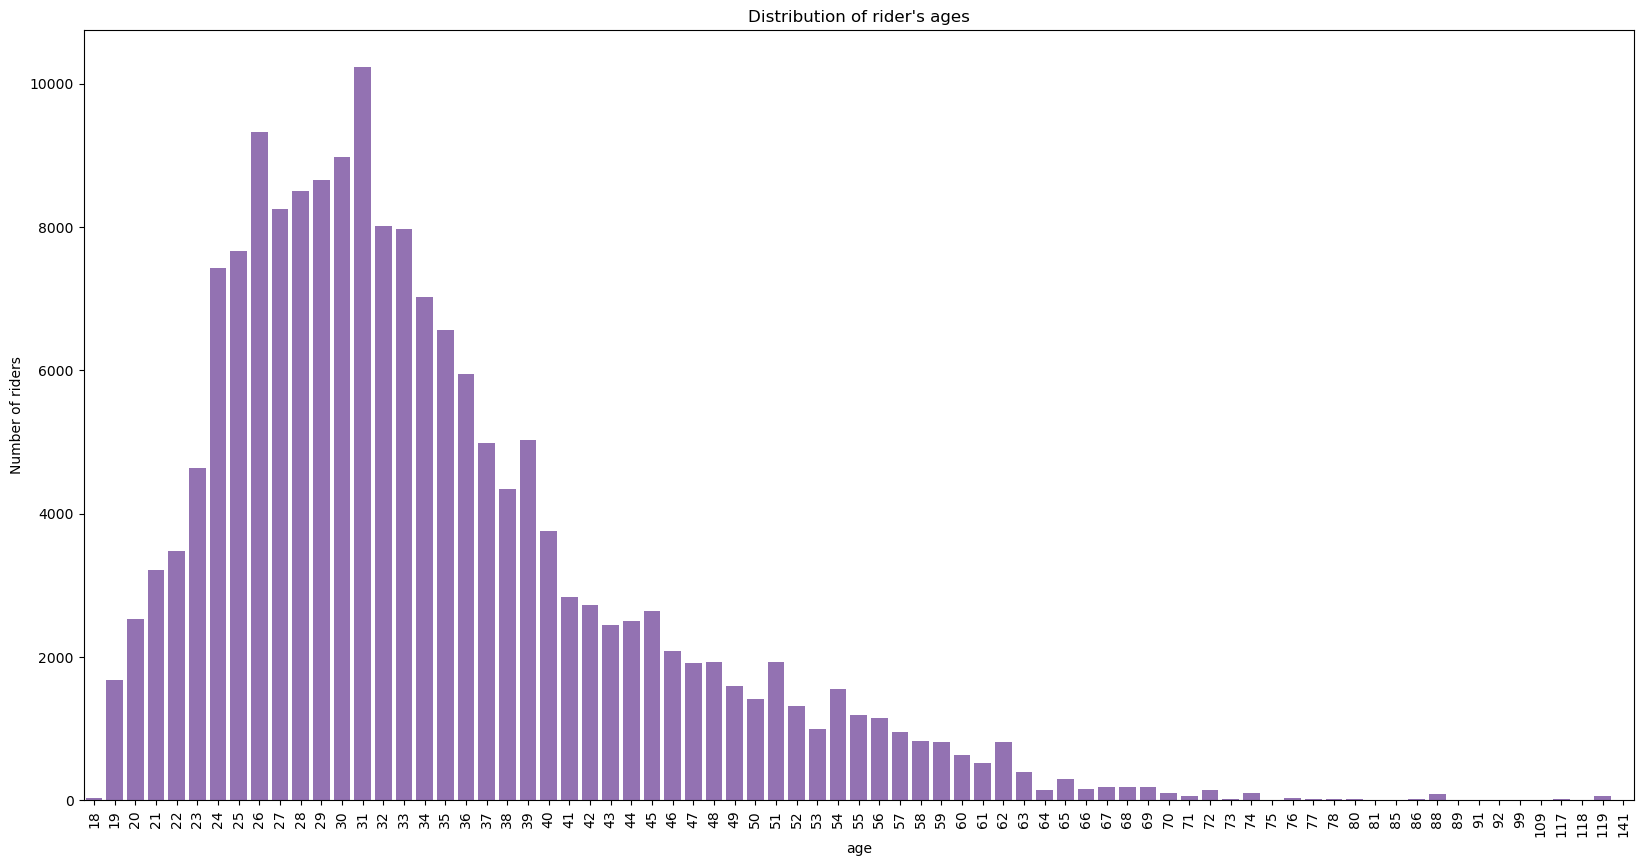

In [152]:
age_subset = df.query('age != 2019')
plt.figure(figsize=(20 , 10))
sb.countplot(x='age',data=age_subset,color=color)
plt.ylabel('Number of riders')
plt.title("Distribution of rider's ages")
plt.xticks(rotation=90);

Suprisingly majority of the riders are in their late 20s to early 30s. We can also outliers who are older than 70 years! The youngest riders are 18 years, this is because of the rental [agreement](https://baywheels-assets.s3.amazonaws.com/terms.html) where the rider has to be 18 and above.

### Q7: Which days had more number of rides

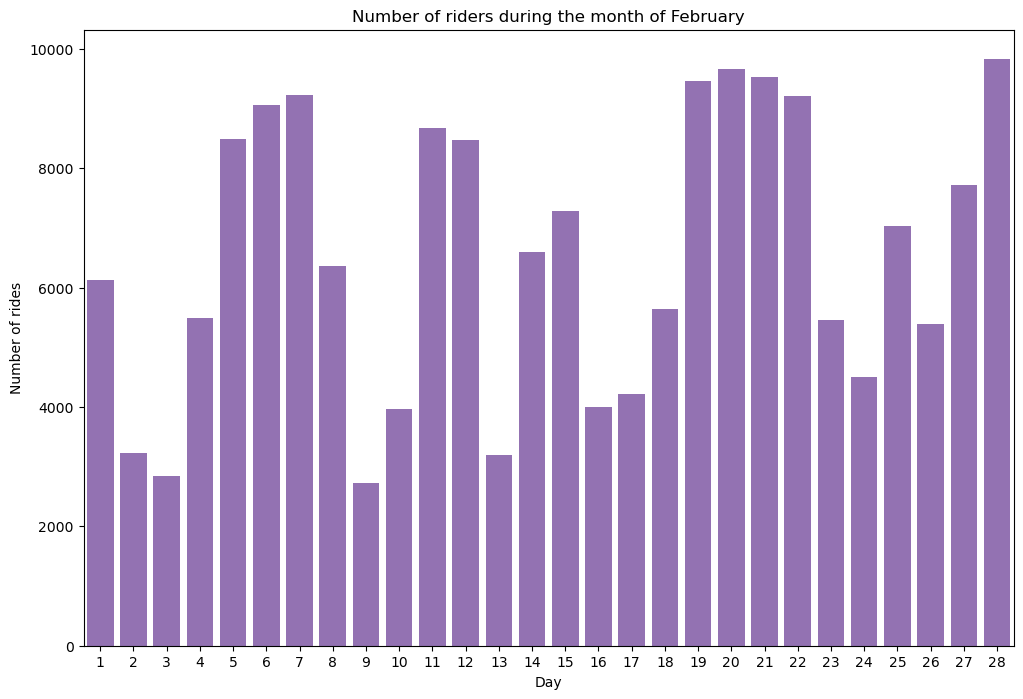

In [153]:
df['day'] = df.start_time.dt.day 
day_count = df.groupby('day')['duration_min']
plt.figure(figsize=(12,8))
sb.countplot(data=df,x='day',color=color)
plt.xlabel('Day')
plt.ylabel('Number of rides')
plt.title("Number of riders during the month of February");

We can see a spike of riders on the days 5-7, 11-12, 19-22 and 28. February 9th recorded the lowest number of riders during that month. 

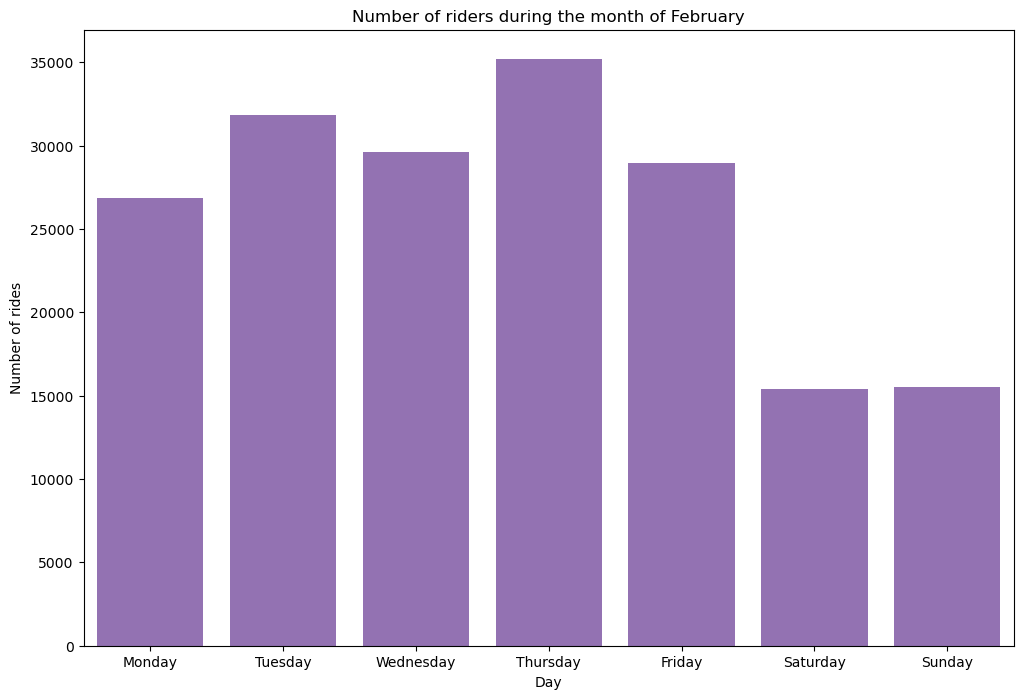

In [182]:
df['day_name'] = df.start_time.dt.day_name()
day_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
plt.figure(figsize=(12,8))
sb.countplot(data=df,x='day_name',color=color,order=day_order)
plt.xlabel('Day')
plt.ylabel('Number of rides')
plt.title("Number of riders during the month of February");

Thursday had the most number of riders with the weekend having the least number of riders.

### Which bikes were mostly used

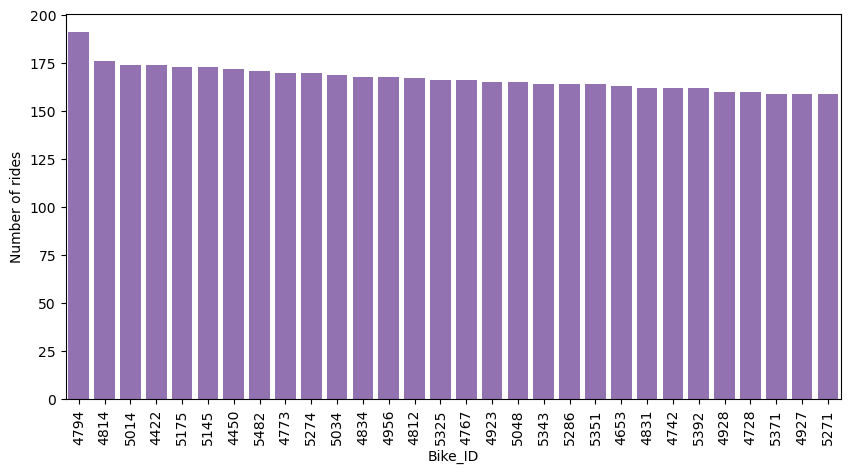

In [154]:
limit_bikes = df.bike_id.value_counts().iloc[:30]
plt.figure(figsize=(10,5))
sb.countplot(data=df,x='bike_id',order=limit_bikes.index,color=color)
plt.xticks(rotation=90)
plt.ylabel('Number of rides')
plt.xlabel('Bike_ID');


The top 30 most used bikes were used 165-175 times aside from `bike_id` 4794 was used almost 190 times in the month of February!

### Most popular station to start a trip

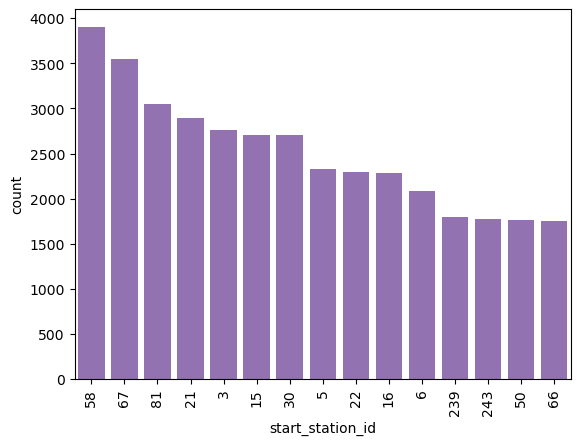

In [155]:
limit_start = df.start_station_id.value_counts().iloc[:15]
sb.countplot(data=df, x='start_station_id',order=limit_start.index,color=color)
plt.xticks(rotation=90);

In [156]:
df.query('start_station_id == 58').start_station_name.iloc[0]

'Market St at 10th St'

We can see the station Market St at 10th St had the most number of trips where it was the station. I wonder if it will also hold true for the station with the most ended trips.

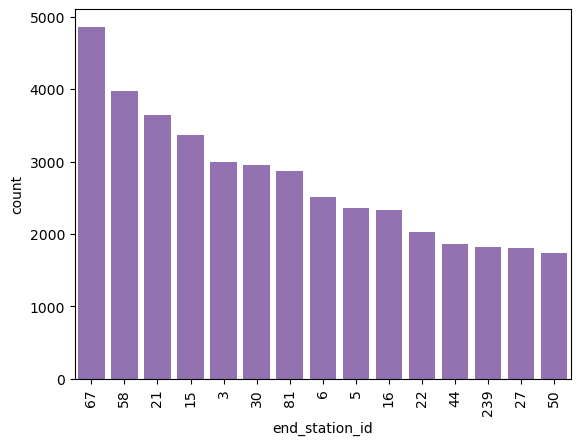

In [157]:
limit_end = df.end_station_id.value_counts().iloc[:15]
sb.countplot(data=df, x='end_station_id',order=limit_end.index,color=color)
plt.xticks(rotation=90);

In [158]:
df.query('end_station_id == 67').end_station_name.iloc[0]

'San Francisco Caltrain Station 2  (Townsend St at 4th St)'

This time San Francisco Caltrain Station 2 (Townsend St at 4th St) is the station with the most ended trips. Market St at 10th St is at the 2nd place this time. In the previous visualization San Francisco Caltrain Station 2 had the 2nd most started trips.



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I transformed the column `duration_sec` to minutes so that the duration would make more sense from first glance and to avoid alot of mental math in converting the seconds to minutes. I also created a new column age to give a better perception of the age of the riders during the time the data was collected. I created day and day_name from the `start_time` column. 

> I noticed that a certain bike was used more than often that the others. I also noticed there are riders who are 80 and above.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I noticed there were certain days (5-7, 11-12, 19-22 and 28) that had a spike of riders with February 9th having the least number of riders for that month

## Bivariate Exploration

### Rides times to the user type

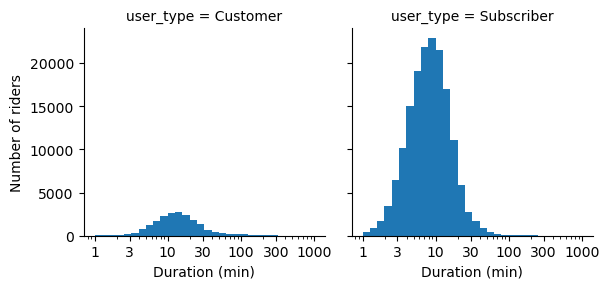

In [159]:
bins = 10**np.arange(0 , 3 + 0.1 , 0.1)
ticks = [1,3,10,30,100,300,1000]
labels = ['{}'.format(b) for b in ticks]
# Plot the Seaborn's FacetGrid
g = sb.FacetGrid(data = df, col = 'user_type')
g.map(plt.hist, "duration_min",bins=bins).set(xscale='log')
g.set_axis_labels('Duration (min)','Number of riders')
g.set(xticks=ticks,xticklabels=labels);

Customers would go for a longer ride (10-30 minutes) on average compared to subscribers who would go for shorter rides (3-10 minutes). We can use a violin plot to see the distribution of ride durations

Text(0.5, 1.0, 'Violin plot of User Types and Ride Duration')

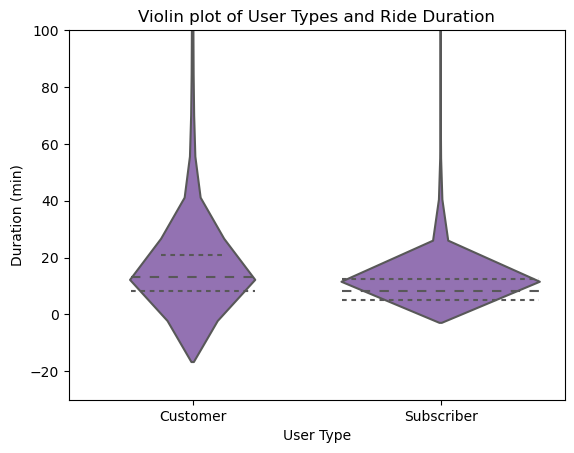

In [160]:
sb.violinplot(x=df.user_type,y=df.duration_min,color=color,inner='quartile')
plt.ylim((-30,100))
plt.ylabel('Duration (min)')
plt.xlabel('User Type')
plt.title("Violin plot of User Types and Ride Duration")

We can see that for the subscribers the mean is about 7 minutes but there is huge distribution of ride lengths on the 3rd quartile. It is then followed by a sharp decrease to around the 30 minute mark and then sharply decreases as it tails off. 
For customers, it's median meets nicely with the subscriber's 3rd quartile. Around the median we also see a huge distribution as it decreases slowly until the 40 minute mark

### How does gender and ride trip relate to each other

Text(0, 0.5, 'Duration (min)')

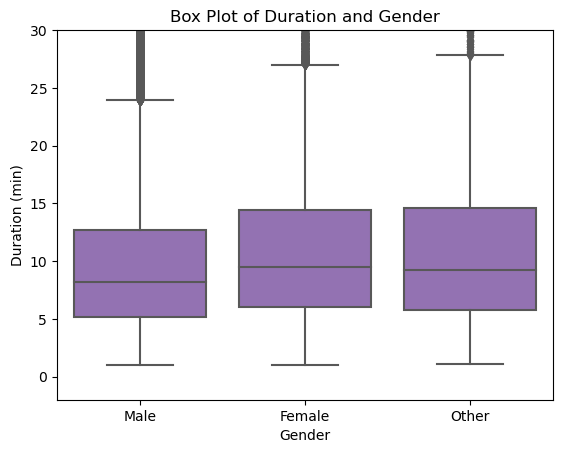

In [161]:
sb.boxplot(data=df,x='member_gender',y='duration_min',color=color,order=gender_order)
plt.ylim([-2,30]) # To ignore the outliers
plt.title('Box Plot of Duration and Gender')
plt.xlabel('Gender')
plt.ylabel('Duration (min)')

Even male riders dominate this dataset, male riders take shorter riders (~8 minutes) compared to the other genders. 

### What are the characteristics of riders who took part in the bike share program

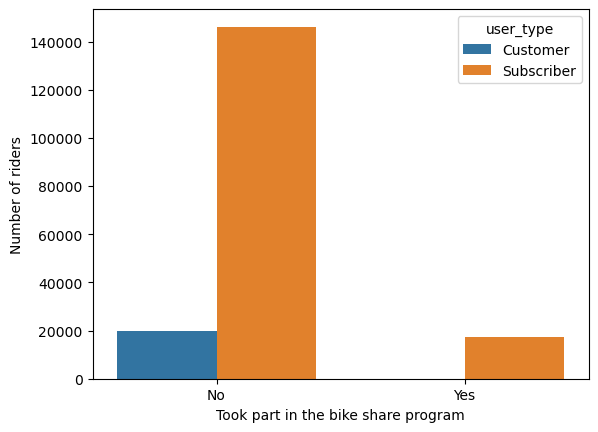

In [162]:
sb.countplot(data=df, x='bike_share_for_all_trip', hue='user_type') 
plt.xlabel('Took part in the bike share program')
plt.ylabel('Number of riders');

Only ~20,000 subscribers took part of the bike share program. This number is even less than the total number of riders who are users!

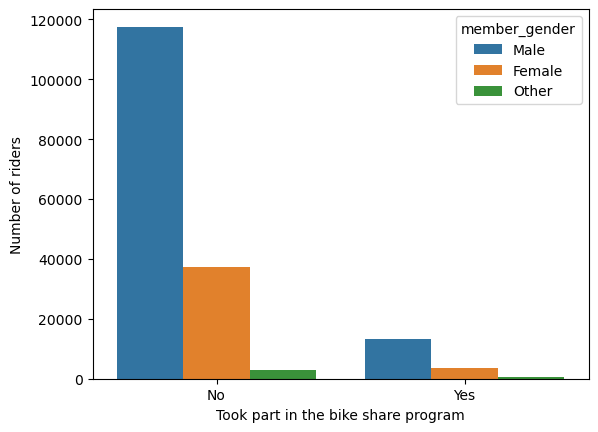

In [163]:
sb.countplot(data=df, x='bike_share_for_all_trip', hue='member_gender',hue_order=gender_order) 
plt.xlabel('Took part in the bike share program')
plt.ylabel('Number of riders');

Males are the major demographics of riders who took part in the program.

Text(0, 0.5, 'Duration (min)')

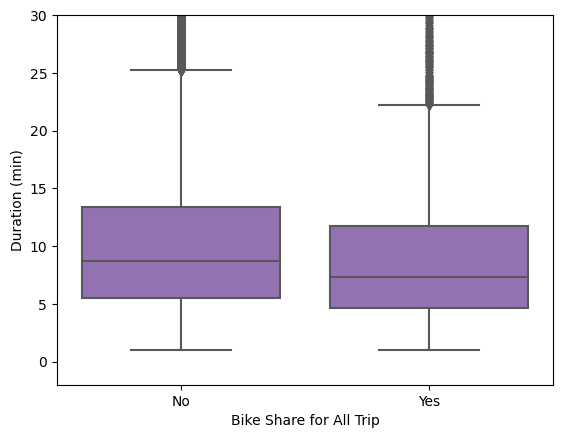

In [164]:
sb.boxplot(data=df,x='bike_share_for_all_trip',y='duration_min',color=color)
plt.ylim([-2,30]) # To ignore the outliers
plt.xlabel('Bike Share for All Trip')
plt.ylabel('Duration (min)')

The bike share for all trips are also shorter. 

### User demographics throughout the month

Text(0.5, 36.72222222222221, 'Day')

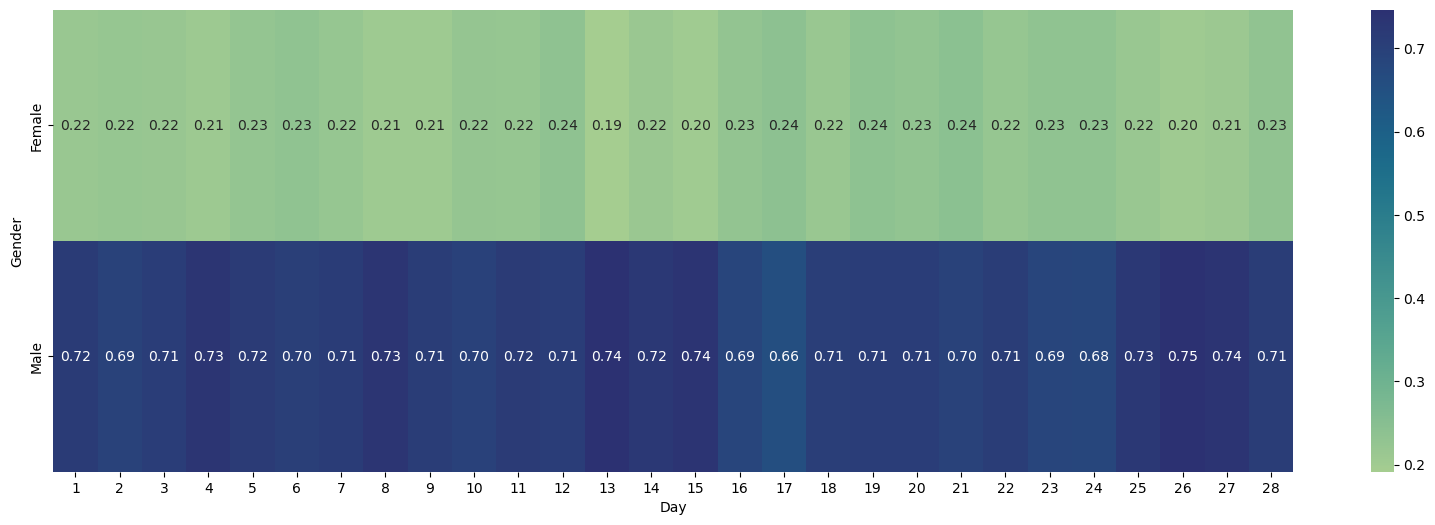

In [165]:
# Just pick male and females
genders_set = df.query("member_gender != 'Other'")
# Get the size of day and member_gender
dm_counts = genders_set.groupby(['day','member_gender']).size()
# Convert the series to dataframe
dm_counts = dm_counts.reset_index(name='count')
dm_counts = dm_counts.pivot(index='member_gender', columns='day', values='count')
# Calculate the proportions
for x in range(1,29):
    total = df.query(f'day == {x}').shape[0]
    dm_counts[x] = dm_counts[x] / total
plt.figure(figsize=(20,6))
sb.heatmap(dm_counts,annot = True, fmt = ".2f",cmap='crest')
plt.ylabel('Gender')
plt.xlabel('Day')

We can still see male riders are still dominating and the male:female ratio is mostly at 7:3

### Bike Usage per hour

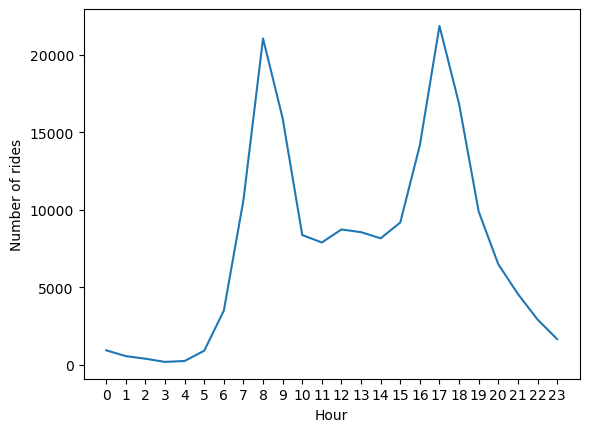

In [166]:
df['start_hour'] = df.start_time.dt.hour
hour_subset = df.groupby('start_hour').size()
hour_subset = hour_subset.reset_index(name = 'count')

sb.lineplot(data=hour_subset,x='start_hour',y='count')
plt.xticks(hour_subset.start_hour)
plt.xlabel('Hour')
plt.ylabel('Number of rides');

We can see a bimodal curve with peaks around 8am and 5pm. I won't be suprised that during the wee-hours of the night is when we have the least numbers of bike usage.

### Plotting the station on the map

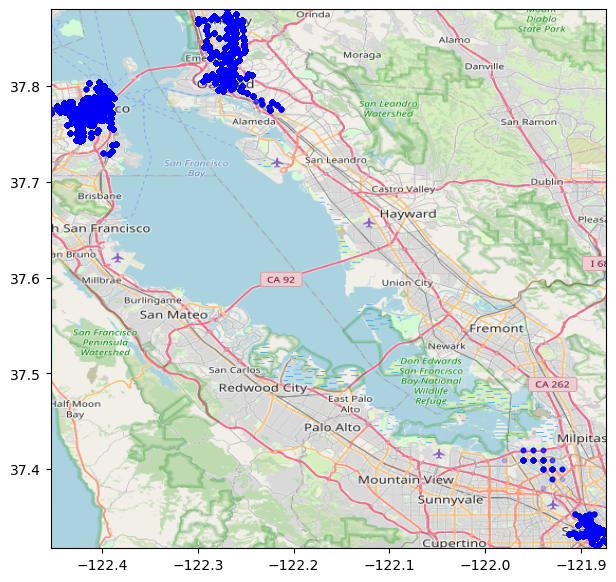

In [167]:
BBOX = ((df.start_station_longitude.min(),df.start_station_longitude.max(),df.start_station_latitude.min(), df.start_station_latitude.max()))
fig, ax = plt.subplots(figsize=(8,7))
ax.scatter(df.start_station_longitude,df.start_station_latitude,zorder=1,alpha=0.2,c='b',s=10)
ax.set_xlim(BBOX[0],BBOX[1])
ax.set_ylim(BBOX[2],BBOX[3])
ax.imshow(plt.imread('map.png'),zorder=0,aspect='equal',extent= BBOX)

The trips are clustered around Oakland, San Francisco and way down San Jose International Airport. There is also an interesting cluster just north of the airport and next to Milpitas. We can also see where bike number 4794 rode around.

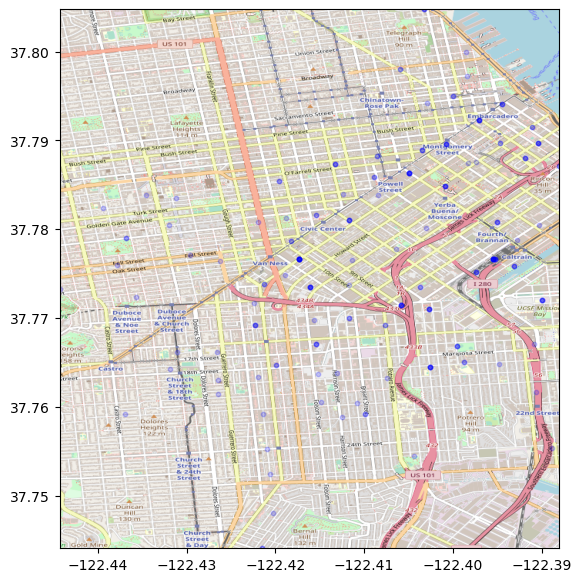

In [168]:
bike_subset = df.query('bike_id == 4794')
BBOX = ((bike_subset.start_station_longitude.min(),bike_subset.start_station_longitude.max(),bike_subset.start_station_latitude.min(), bike_subset.start_station_latitude.max()))
fig, ax = plt.subplots(figsize=(8,7))
ax.scatter(bike_subset.start_station_longitude,bike_subset.start_station_latitude,zorder=1,alpha=0.2,c='b',s=10)
ax.set_xlim(BBOX[0],BBOX[1])
ax.set_ylim(BBOX[2],BBOX[3])
ax.imshow(plt.imread('map_1.png'),zorder=0,aspect='equal',extent= BBOX)

Most of it's trips are around the busy market street and on the subway station at King Street.

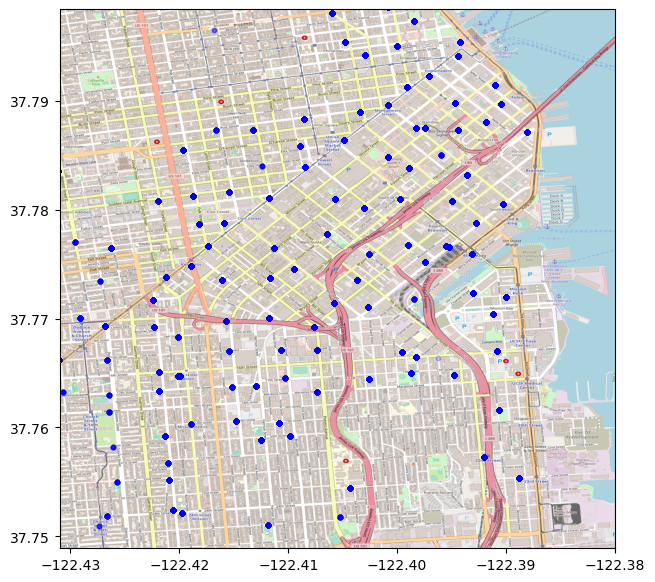

In [172]:
bay_areaBBOX = (-122.431,-122.380,37.7489,37.7984)
morning_subset = df.query('start_hour==8')
fig, ax = plt.subplots(figsize=(8,7))
ax.scatter(morning_subset.start_station_longitude,df.start_station_latitude,zorder=1,alpha=0.2,c='b',s=10)
ax.set_xlim(bay_areaBBOX[0],bay_areaBBOX[1])
ax.set_ylim(bay_areaBBOX[2],bay_areaBBOX[3])
ax.imshow(plt.imread('map_2.png'),zorder=0,aspect='equal',extent= bay_areaBBOX)

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Bike Usage per Hour demographics

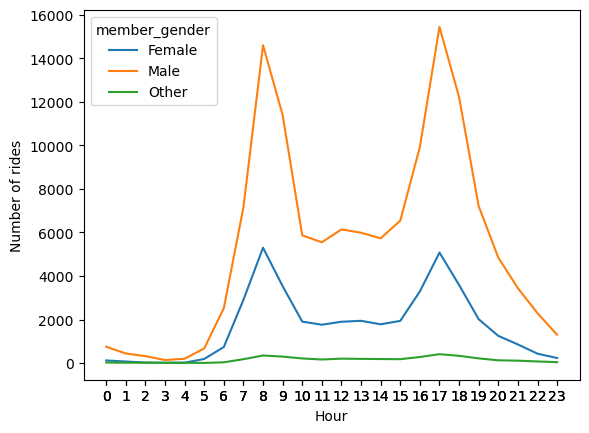

In [104]:
hour_subset = df.groupby(['start_hour','member_gender']).size()
hour_subset = hour_subset.reset_index(name = 'count')

sb.lineplot(data=hour_subset,x='start_hour',y='count',hue='member_gender')
plt.xticks(hour_subset.start_hour)
plt.xlabel('Hour')
plt.ylabel('Number of rides');

The story is still the same as before but we can see a small spike of male riders at around the Noon mark

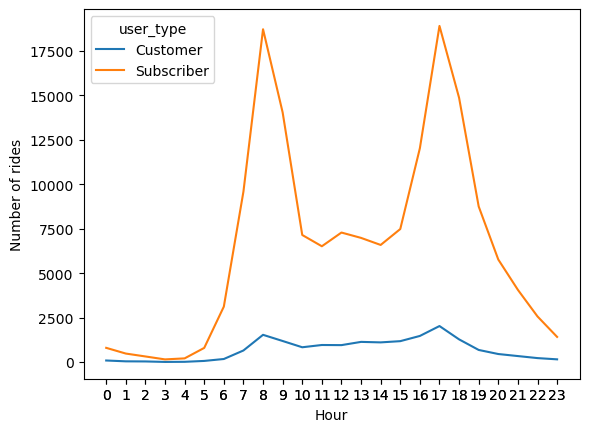

In [111]:
hour_subset = df.groupby(['start_hour','user_type']).size()
hour_subset = hour_subset.reset_index(name = 'count')

sb.lineplot(data=hour_subset,x='start_hour',y='count',hue='user_type')
plt.xticks(hour_subset.start_hour)
plt.xlabel('Hour')
plt.ylabel('Number of rides');

The spike is also more pronounced here with subscribers. Maybe it's because of the sheer number of those demographics.

### Looking at how long the rides are with different demographics

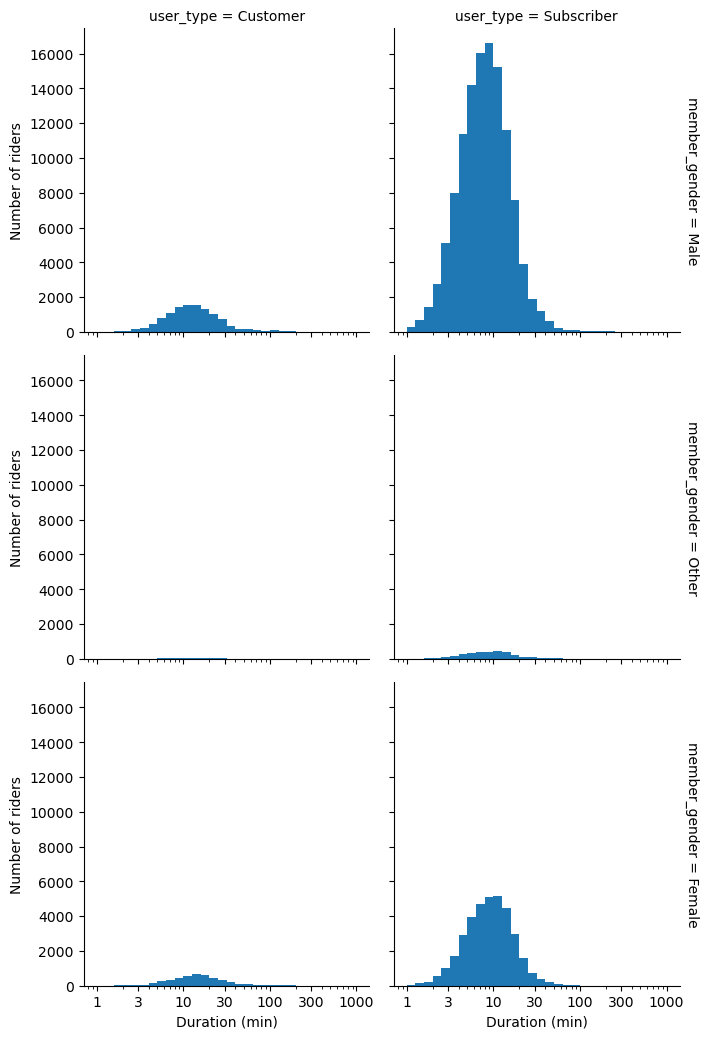

In [118]:
bins = 10**np.arange(0 , 3 + 0.1 , 0.1)
ticks = [1,3,10,30,100,300,1000]
labels = ['{}'.format(b) for b in ticks]
# Plot the Seaborn's FacetGrid
g = sb.FacetGrid(data = df, col = 'user_type',row='member_gender',margin_titles=True,height=3.5)
g.map(plt.hist, "duration_min",bins=bins).set(xscale='log')
g.set_axis_labels('Duration (min)','Number of riders')
g.set(xticks=ticks,xticklabels=labels);

We can see a small number of female customer riders that went for a long ride(100-300 minute mark). We also alot of rides that fall on that range on the male riders that are subscribers.  

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

